# Critical $\chi^2$ values
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array
from scipy.stats import gamma

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of confidence level limit

In [3]:
# Return value of x corresponsing to Frequentist upper (one-sided) limit on given CL
# Use 1-CL for lower limit

def problim(Ndf,cl):
    
    # Gamma distribution parameters for given Ndf
    
    mean = Ndf
    sigma = np.sqrt(2.*Ndf)
 
    k = (mean/sigma)**2
    invlam = sigma**2/mean

    # Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = gamma.isf(1-cl,k, scale=invlam)

    return xlim


### (3) Define considered probability values

In [4]:
# Considered values of probability

pvec = np.array([0.01,0.05,0.1,0.5,0.9,0.95,0.99])

# Graphic options

pcol = np.array([6,2,3,4,3,2,6],dtype=int)
plin = np.array([7,7,7,3,1,1,1],dtype=int)

# Considered degrees of freedom

Nmax = 20

nvec = np.arange(1,Nmax+1)


### (4)  Calculate critical $\chi^2$ curves

In [5]:
chi2tab = np.empty((pvec.size,nvec.size))

for ip in range(pvec.size) :
    cl = pvec[ip]
    chi2tab[ip,:] = problim(nvec,cl)/nvec


### (5) Draw critical $\chi^2$ curves

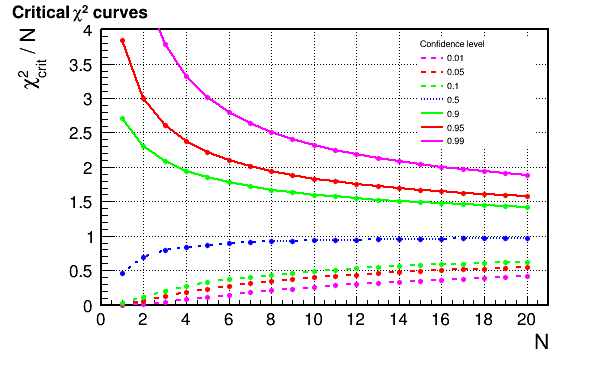

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Warning in <TROOT::Append>: Replacing existing TH1: hexp (Potential memory leak).
Info in <TCanvas::Print>: png file 07_critical.png has been created


In [12]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

# gStyle.SetCanvasDefH(600)  # Default is 600 x 400

cexp = TCanvas('cexp')
   
# Histogram to produce frame

Xmin=0
Xmax=Nmax+1
Ymin=0
Ymax=4.   #  1.1*np.max(chi2tab)

hexp = TH1D('hexp','Critical #chi^{2} curves',10, Xmin, Xmax)

hexp.GetXaxis().SetTitle("N")
hexp.GetYaxis().SetTitle("#chi^{2}_{crit} / N")
hexp.SetMinimum(Ymin)
hexp.SetMaximum(Ymax)
hexp.SetLineWidth(0)    # To suppress horizontal line at zero

# No statistics

hexp.SetStats(0)

# Plot empty histogram (frame)

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

# Overlay critical lines

lint = TLine()
lint.SetLineColor(3)
lint.SetLineWidth(2)

clgr = []

leg = TLegend(0.7,0.6,0.9,0.9)
leg.SetHeader("Confidence level") #,"C") # option "C" allows to center the header
    
for ip in range(pvec.size) :
    cl = pvec[ip]
    icol=int(pcol[ip])
    ilin=int(plin[ip])
    clgr.append(TGraph(nvec.size,array('d',nvec),array('d',chi2tab[ip,:])))
    clgr[ip].SetNameTitle('clgr_'+str(ip),'Critical #chi^{2}/N for CL = '+str(cl))
    
    # Graphic style
    
    clgr[ip].SetMarkerStyle(20)
    clgr[ip].SetMarkerSize(0.7)
    clgr[ip].SetMarkerColor(icol)
    clgr[ip].SetLineColor(icol)
    clgr[ip].SetLineWidth(2)
    clgr[ip].SetLineStyle(ilin)
    clgr[ip].Draw('PL')

    leg.AddEntry(clgr[ip],str(cl),"L");
    
leg.Draw()

cexp.Update()
fname = '07_critical.png'
cexp.Print(fname)

Image(filename=fname)

In [ ]:
# Plot limit graphs

lgr.Draw('PL')
hgr.Draw('PL')

# Store and show

cexp.Update()
# fname = '06_gauss_interval_2_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

In [ ]:
Xm = 2.3

lxm = TLine()
lxm.SetLineColor(1)
lxm.SetLineWidth(2)
lxm.SetLineStyle(7)

lxm.DrawLine(Xm,Ymin,Xm,Ymax)

cexp.Update()
# fname = '06_gauss_interval_3_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

In [ ]:
# Look for proper point in limit table
# Interpolate between two points

for im in range(vmean.size-1) :
    if Xm > vlow[im] and Xm <= vlow[im+1]:
        frac = (Xm-vlow[im])/(vlow[im+1]-vlow[im])
        print('Upper limit : ',frac*vmean[im+1]+(1-frac)*vmean[im])
    if Xm > vhig[im] and Xm <= vhig[im+1]:
        frac = (Xm-vhig[im])/(vhig[im+1]-vhig[im])
        print('Lower limit : ',frac*vmean[im+1]+(1-frac)*vmean[im])        